In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/data_2005.csv')
data = df[['Time', 'Rain_rate','Rain_Attenuation']]
data.head()

,Time,Rain_rate,Rain_Attenuation
0,2.083222,0.123969,0.277891
1,2.083502,0.122079,0.374563
2,2.083782,0.120313,0.309713
3,2.084062,0.118503,0.406240
4,2.084342,0.116721,0.329704


In [ ]:
def decimal_time(time):
    hours = int(time)
    minutes = (time*60) % 60
    seconds = (time*3600) % 60
    f =  (time*3600000000) % 1000000
    return ("%d:%02d:%02d.%03d" % (hours, minutes, seconds,f))

(87369, 3) (87387, 4)
                        Time  Rain_rate  Rain_Attenuation
0 1900-01-01 02:04:59.599919   0.123969          0.277891
1 1900-01-01 02:05:00.607920   0.122079          0.374563
2 1900-01-01 02:05:01.615920   0.120313          0.309713
3 1900-01-01 02:05:02.623920   0.118503          0.406240
4 1900-01-01 02:05:03.631920   0.116721          0.329704


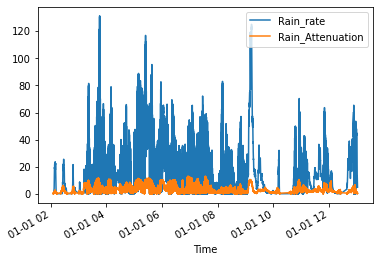

In [ ]:
data['Time'] = data['Time'].apply(lambda x : decimal_time(x))
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S.%f')
data = data.drop_duplicates(subset = ['Time'])
print(data.shape, df.shape)
data1 = data.set_index('Time')
print(data.head())
data1.plot()

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(data1,-1,1).eig

array([0.23147758, 0.04166872])

In [ ]:
train = data1[:int(0.8*(len(data1)))]
valid = data1[int(0.8*(len(data1))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
cols = ['Rain_rate','Rain_Attenuation']
pred = pd.DataFrame(index=valid.index,columns= cols)
for j in range(0,2):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for Rain_rate is :  18.37086334367974
rmse value for Rain_Attenuation is :  2.1288606024781167


In [ ]:
pred['Rain_Attenuation'].head(10)

Time
1900-01-01 08:48:10.771919    3.15273
1900-01-01 08:48:10.976040    3.36831
1900-01-01 08:48:11.328119    3.37776
1900-01-01 08:48:11.779919    3.37828
1900-01-01 08:48:11.984040    3.37831
1900-01-01 08:48:12.336119    3.37831
1900-01-01 08:48:12.787920    3.37831
1900-01-01 08:48:12.992040    3.37831
1900-01-01 08:48:13.344119    3.37831
1900-01-01 08:48:13.795919    3.37831
Name: Rain_Attenuation, dtype: object

In [ ]:
valid['Rain_Attenuation'].head(10)

Time
1900-01-01 08:48:10.771919    6.202728
1900-01-01 08:48:10.976040    0.532770
1900-01-01 08:48:11.328119    0.636361
1900-01-01 08:48:11.779919    6.142526
1900-01-01 08:48:11.984040    0.640919
1900-01-01 08:48:12.336119    0.486393
1900-01-01 08:48:12.787920    6.109653
1900-01-01 08:48:12.992040    0.938026
1900-01-01 08:48:13.344119    0.800877
1900-01-01 08:48:13.795919    6.092459
Name: Rain_Attenuation, dtype: float64

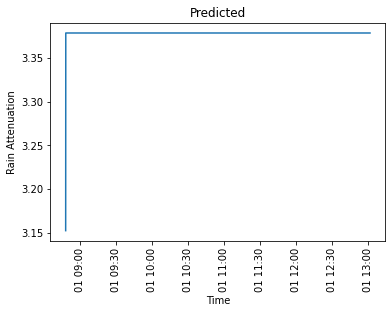

In [ ]:
plt.plot(pred.index,pred['Rain_Attenuation'])
plt.title('Predicted')
plt.ylabel('Rain Attenuation')
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.show()

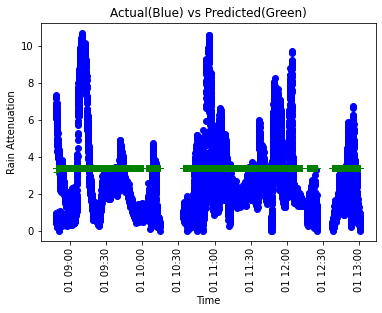

In [ ]:
plt.plot(valid['Rain_Attenuation'], 'ro',color = 'blue', label = 'Actual')
plt.plot(pred['Rain_Attenuation'],'r+',  color = 'green', label = 'Predicted')
plt.xticks(rotation=90)
plt.xlabel('Time')
plt.title('Actual(Blue) vs Predicted(Green)')
plt.ylabel('Rain Attenuation')
plt.show()

In [ ]:
model = VAR(endog=data1)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


[[12.00564547  2.70422211]]
